# Demonstration of Animated Graph In the Context of Heat Diffusion
This exercise demonstrates how one can compute 1-dimensional heat flux through conduction and how this leads to the "diffusion" of heat discontinuities.

## Numerical computations
The first part of the exercise performs all the computations. 
### Import Numpy Library

In [1]:
import numpy as np

### Set parameters
Here the main constants and physical parameters used in the solution are specified.

In [2]:
dx = 0.05    #length of spatial step
L = 1        #length of bar in meters
dt = 2       #seconds
tmax = 3600   #seconds
k = 205       #J/s/m/K
c = 900      #J/kg/K
rho = 2700   #density, kg/m3
kappa = k/(c*rho) #diffusion coef

### Specify initial and boundary conditions

The temperature at either end of the bar and across the entire bar at the beginning of the computation must be set before the solution can be computed.

In [3]:
T0 = 50      #initial condition, degrees C
Tleft = 100    #left boundary, degrees C
Tright = 0 #right boundary, degrees C

### Define and initialize grid
The values of x at which computations occur are set up using the spatial step dx that we set previously.  We also set up times when we will perform the computation using the dt we set previously.

In [4]:
x = np.arange(0,L+dx,dx)
t = np.arange(0,tmax+dt,dt)

We will also need ot know the maximum index for the columns (i.e, the number of x values where we do computations) and the maximum index for the number of rows (i.e., the number of timesteps where we do computations).

In [5]:
rowmax = int(tmax/dt)
columnmax = int(L/dx)

Create an array of empty temperature values.  Here, we'll just set up an array of "1s" using a command in numpy defined for this purpose.

In [6]:
T=np.ones((rowmax+1,columnmax+1))

Set initial conditions.  Here, the temperature is now re-set to the initial value we set when we defined parameters.

In [7]:
T[0,...]=T0

Set boundary conditions.  Here, we have two boundaries, one on the left said and one on the right.  We set these given the parameters that were entered previously.

In [8]:
T[...,0] = Tleft
T[...,columnmax] = Tright

### Perform computations  
Here, we recursively compute the value for temperature T for all non-boundary and non-initial value cells in the table. The iteration occurs in a loop that eventually runs through every cell for which a computation is needed.

In [9]:
#start at row 0 and go to the next to last row
for i in range(0,rowmax):   
    #start at column 1 and go to the next to last column
    for m in range(1,columnmax):  
        T[i+1,m]=T[i,m]+ kappa * dt/dx**2*(T[i,m+1]-2*T[i,m]+T[i,m-1])

## Graph the results
Now that computations are complete, we have a two-dimensional array with all the results we need.  All that is left is to graph them.
### Import graphing libraries

In [10]:
import matplotlib.pyplot as plt
#import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, PillowWriter

### Create plot of T vs t at x = 95, 50, and 5 cm

Text(0.5, 0, 'Time (s)')

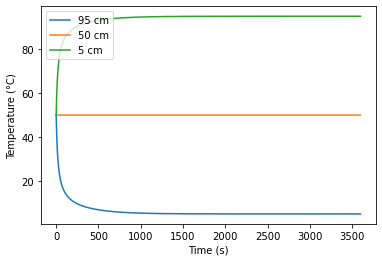

In [11]:
fig1 = plt.figure()
subfig = fig1.add_subplot(1, 1, 1)
line, = subfig.plot(t,T[:,19],label='95 cm')
line2, = subfig.plot(t,T[:,10],label='50 cm')
line3, = subfig.plot(t,T[:,1],label='5 cm')
subfig.legend()
plt.ylabel('Temperature (°C)')
plt.xlabel('Time (s)')

### Create plot of T vs x at t = 5, 10, 30, and 60 minutes

Text(0.5, 0, 'x (m)')

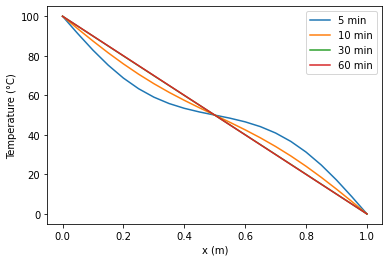

In [12]:
#Create plot of T vs x at t = 5, 10, 30, and 60 minutes
fig2 = plt.figure()
subfig = fig2.add_subplot(1, 1, 1)
line, = subfig.plot(x,T[150,:],label='5 min')
line2, = subfig.plot(x,T[300,:],label='10 min')
line3, = subfig.plot(x,T[900,:],label='30 min')
line4, = subfig.plot(x,T[1800,:],label='60 min')
subfig.legend()
plt.ylabel('Temperature (°C)')
plt.xlabel('x (m)')

### Compare with observed data
Here, to illustrate the process, we import data from a textfile and then add that to the previous graph. We also add a label to these data points indicating they were supposed to have been measured at t=10 minutes. Note that the x values that are added here would need to have been measured when the experiment was performed.  The x values represent all points where temperatures were measured.

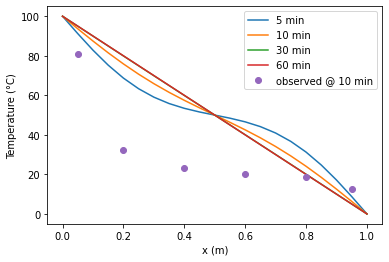

In [13]:
#import data 
ObservedT = np.genfromtxt('instructor.txt', delimiter=',', skip_header=1)
#define x values
x_instructor = np.array([0.05, 0.2,0.4, 0.6, 0.8, 0.95])
line5, = subfig.plot(x_instructor, ObservedT[62,1:7],'o', label = 'observed @ 10 min')
subfig.legend()
fig2

### Create an animation
The animation requires the generation of a figure that gets saved to the animation at regular intervals.

Start the backend that allows for external graphs. The animation will not be visible in the notebook.

In [14]:
%matplotlib auto

Using matplotlib backend: TkAgg


Create and format the figure that will be animated. This performs all work on the initial condition.

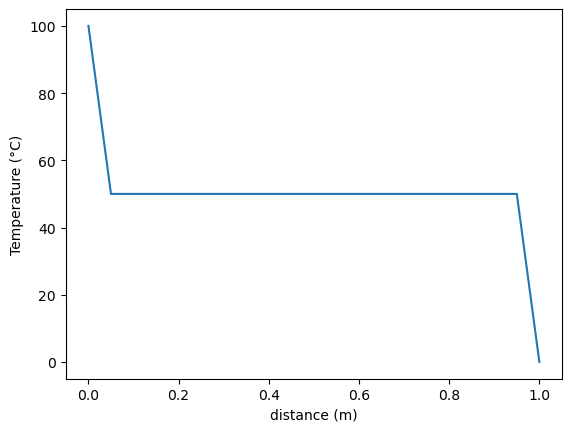

In [15]:
fig3 = plt.figure()
subfig = fig3.add_subplot(1, 1, 1)
line, = subfig.plot(x,T[0,:])
plt.ylabel('Temperature (°C)')
plt.xlabel('distance (m)')
fig3

Create a function that will update the figure at regular intervals.  It has to return the line that we want to animate.

In [16]:
# This function is called periodically from FuncAnimation

def animate(i, x, T, t):
    #updata data in plot using index i
    line.set_ydata(T[i,:])
    # Format Title  with time in it
    plt.title(f'Time = {t[i]:.2f} seconds')
    return line, #it is necessary to return this
# Set up plot to call animate() function periodically
ani = FuncAnimation(fig3, animate, fargs=(x, T, t), interval=20, repeat=True, save_count=10)
plt.show()

Specify location of animation tool and where the animation will be saved.

In [17]:
ani.save('animation.gif', writer=PillowWriter(fps=24))

C:\Users\WesLa\anaconda3\lib\site-packages\ipykernel\eventloops.py:256: RuntimeWarning: coroutine 'Kernel.do_one_iteration' was never awaited
  self.func()
